In [38]:
import pandas as pd

In [39]:
df = pd.read_excel("Hospital_DataCleaned_Sqrt (1).xlsx")

In [36]:
df_Copy = df.copy()

In [37]:
df["Hospital overall rating"].unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [6]:
df.nunique()

Unnamed: 0                                                                                                                                                    447530
Score                                                                                                                                                           9155
Denominator                                                                                                                                                      864
Lower Estimate                                                                                                                                                   382
Higher Estimate                                                                                                                                                  671
HCAHPS Answer Percent                                                                                                                                            101
Number of 

In [7]:
df.nunique()

Unnamed: 0                                                                                                                                                    447530
Score                                                                                                                                                           9155
Denominator                                                                                                                                                      864
Lower Estimate                                                                                                                                                   382
Higher Estimate                                                                                                                                                  671
HCAHPS Answer Percent                                                                                                                                            101
Number of 

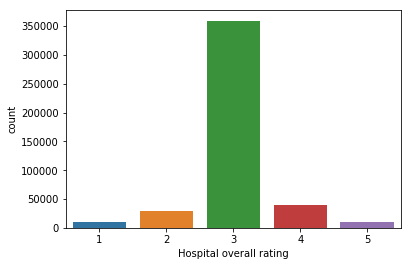

In [12]:
import seaborn as sns
sns.countplot(df_Copy["Hospital overall rating"])

# Stratified sampling 

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(df,df["Hospital overall rating"]):
    print("TRAIN:", train_index, "TEST:", test_index)
    train = df.loc[train_index]
    test = df.loc[test_index]

TRAIN: [413766 193394 334940 ... 342100 365500 377318] TEST: [201119 381122 261624 ...  85112 239124 152056]
TRAIN: [306319 186331 112399 ... 315406 385247  71501] TEST: [ 25085 372915 113836 ... 398747  42334 276234]
TRAIN: [190301 387689 216848 ... 249098 286475 398962] TEST: [172530 370604 161380 ... 262373 243022 325569]
TRAIN: [374225 233823 343295 ... 185251 386241 400086] TEST: [418141 115011 135140 ... 284902 107930 149674]
TRAIN: [386478 273179 446399 ... 253191 234167 157011] TEST: [238379 443663 393281 ... 411571   2308 391733]
TRAIN: [202049 261970  48191 ... 171053  15417 282338] TEST: [ 16338 378285 211293 ... 141559  19873  82542]
TRAIN: [241057  15821 330994 ...  45962  67398  34148] TEST: [339538   7641 121060 ... 371621  41641 350352]
TRAIN: [181219 437762 168658 ...  16043 259540 415746] TEST: [414181 153764 224837 ...  16764 240987  75598]
TRAIN: [301724  18480 400607 ...  62062 335029  36121] TEST: [198642 168730  57546 ... 128341   5330 278956]
TRAIN: [216294 1726

# Logistic Regression Model

In [14]:
from collections import Counter
from sklearn.datasets import make_classification
#Train data
X = train.drop(columns=["Measure ID","Measure Name","HCAHPS Measure ID","HCAHPS Question","HCAHPS Answer Description","Survey Response Rate Percent","Hospital overall rating"],axis = 1)
Y = train["Hospital overall rating"]
print("Hospital overall rating unique values:")
print(sorted(Counter(Y).items()))
Y= Y.astype(float)

Hospital overall rating unique values:
[(1, 8093), (2, 22809), (3, 287493), (4, 31248), (5, 8381)]


In [15]:
print(X)

        Unnamed: 0     Score  Denominator  Lower Estimate  Higher Estimate  \
331933      331933 -1.467764     0.327582       -1.921471        -2.306951   
300156      300156  0.235607     0.165998        0.221844         0.153645   
65649        65649  0.235607     0.165998        0.221844         0.153645   
294589      294589 -0.124758     3.045227       -0.263933        -0.648534   
342788      342788  0.235607     0.165998        0.221844         0.153645   
429703      429703  0.527915     3.183089        0.429986         0.200669   
371911      371911  0.235607     0.165998        0.221844         0.153645   
283146      283146  0.235607     0.165998        0.221844         0.153645   
439447      439447  0.235607     0.165998        0.221844         0.153645   
123934      123934  0.051682     0.165998        0.221844         0.153645   
127797      127797  1.933285     0.165998        0.221844         0.153645   
409037      409037 -1.488816     3.366410       -1.962106       

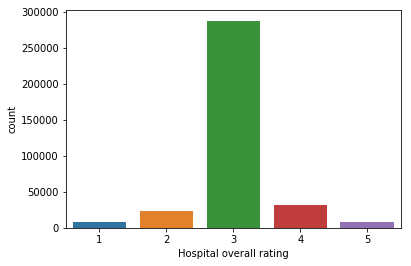

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(train["Hospital overall rating"])

In [17]:
#X = train[["Denominator","Lower Estimate","Higher Estimate","HCAHPS Answer Percent","Number of Completed Surveys","Score"]]
#Y = train[["Hospital overall rating"]]

In [18]:
# Test data
test_X = test.drop(columns=["Measure ID","Measure Name","HCAHPS Measure ID","HCAHPS Question","HCAHPS Answer Description","Survey Response Rate Percent","Hospital overall rating"],axis = 1)
test_Y = test[["Hospital overall rating"]]

# Model

In [19]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X,Y)
print(logmodel.fit(X,Y))
predictions = logmodel.predict(test_X)

C:\Users\tulas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tulas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\tulas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tulas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


# Classification Report

In [20]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2023
           2       0.00      0.00      0.00      5703
           3       0.80      1.00      0.89     71873
           4       0.00      0.00      0.00      7812
           5       0.00      0.00      0.00      2095

    accuracy                           0.80     89506
   macro avg       0.16      0.20      0.18     89506
weighted avg       0.64      0.80      0.72     89506



C:\Users\tulas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tulas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tulas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# confusion matrix

In [21]:
from sklearn.metrics import classification_report
from sklearn import metrics
cm= metrics.confusion_matrix(test_Y,predictions)
print(cm)


[[    0     0  2023     0     0]
 [    0     0  5703     0     0]
 [    0     0 71873     0     0]
 [    0     0  7812     0     0]
 [    0     0  2095     0     0]]


Text(0.5, 257.44, 'Predicted label')

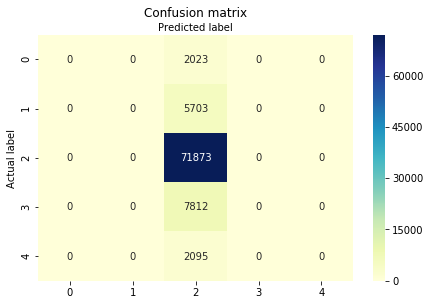

In [22]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[1,2,3,4,5] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
vif = pd.DataFrame()
X1 = train[["Denominator","Lower Estimate","Higher Estimate","HCAHPS Answer Percent","Number of Completed Surveys","Score"]]
vif["VIF Factor"] = [variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif["features"]= X1.columns

# Multi collinearity [Variable inflation Factor]

In [25]:
vif.round(1)

,VIF Factor,features
0,1.3,Denominator
1,6.9,Lower Estimate
2,8.3,Higher Estimate
3,1.0,HCAHPS Answer Percent
4,1.0,Number of Completed Surveys
5,2.2,Score


In [26]:
print(train.head())

        Unnamed: 0     Score  Denominator  Lower Estimate  Higher Estimate  \
331933      331933 -1.467764     0.327582       -1.921471        -2.306951   
300156      300156  0.235607     0.165998        0.221844         0.153645   
65649        65649  0.235607     0.165998        0.221844         0.153645   
294589      294589 -0.124758     3.045227       -0.263933        -0.648534   
342788      342788  0.235607     0.165998        0.221844         0.153645   

        HCAHPS Answer Percent  Number of Completed Surveys  \
331933              -1.461763                    -1.908878   
300156               0.139158                    -2.292312   
65649                0.139158                     0.161300   
294589               0.139158                     1.752677   
342788               2.274659                    -1.319715   

        Hospital overall rating  \
331933                        3   
300156                        3   
65649                         3   
294589            

# Removing columns with vif>5

In [27]:
X2 = X.drop(["Lower Estimate","Higher Estimate"],axis=1)
Y= train["Hospital overall rating"]
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X2,Y)
test_X1 = test_X.drop(["Lower Estimate","Higher Estimate"],axis=1)
predictions = logmodel.predict(test_X1)

C:\Users\tulas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tulas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Model after eliminating features[Classification Report]

In [28]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(test_Y,predictions))
print("#########Coefficients of logistic regression model##################")
print("\n")

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2023
           2       0.00      0.00      0.00      5703
           3       0.80      1.00      0.89     71873
           4       0.00      0.00      0.00      7812
           5       0.00      0.00      0.00      2095

    accuracy                           0.80     89506
   macro avg       0.16      0.20      0.18     89506
weighted avg       0.64      0.80      0.72     89506

#########Coefficients of logistic regression model##################




C:\Users\tulas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tulas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\tulas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Confusion matrix

Text(0.5, 257.44, 'Predicted label')

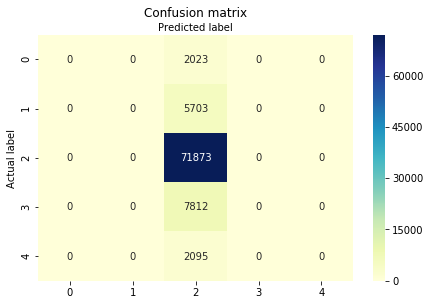

In [29]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[1,2,3,4,5] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# VIF round2

In [30]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])]
vif["features"]= X2.columns
vif.round(2)

C:\Users\tulas\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\tulas\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,2.64,Unnamed: 0
1,1.24,Score
2,1.22,Denominator
3,1.01,HCAHPS Answer Percent
4,1.22,Number of Completed Surveys
5,inf,Hospital Type_Acute Care Hospitals
6,inf,Hospital Type_Childrens
7,inf,Hospital Type_Critical Access Hospitals
8,inf,Hospital Type_Psychiatric
9,inf,Hospital Ownership_Government - Federal


In [35]:
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X2,Y)
  

In [34]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler